<a href="https://colab.research.google.com/github/Trickshotblaster/nn-practices/blob/main/MaybeTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import math

In [13]:
vocab_size = 30000
emb_dim = 4
qkv_size = 3
context_len = 20
num_heads = 8

In [3]:
C = torch.randn(vocab_size, emb_dim)
Wq, Wk, Wv = torch.randn(3, emb_dim, qkv_size)

params = [C, Wq, Wk, Wv]
for p in params:
  p.requires_grad = True

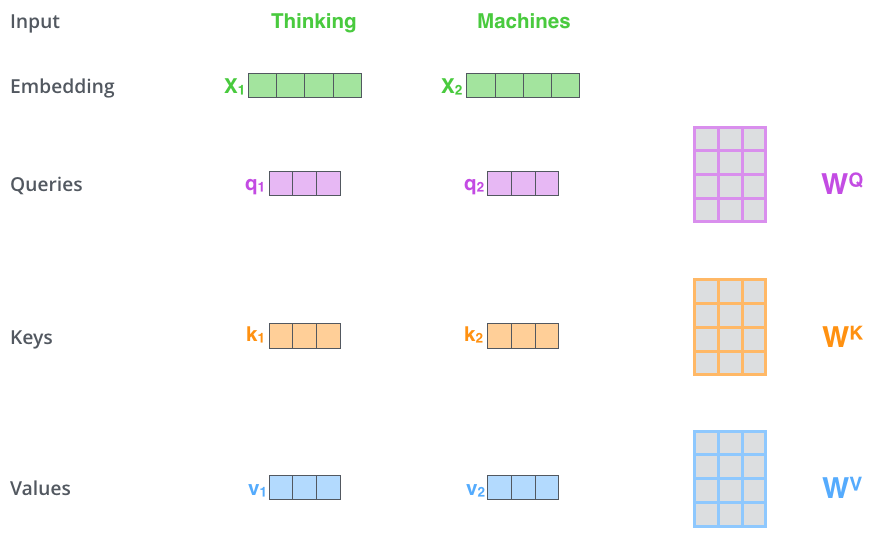

In [4]:
C[torch.tensor([1])] @ Wq # beautiful (also order matters apparently?)

tensor([[-1.4296,  0.5673,  0.9973]], grad_fn=<MmBackward0>)

In [5]:
C[torch.tensor([1])] @ Wk

tensor([[ 0.5298,  1.2040, -0.0239]], grad_fn=<MmBackward0>)

In [6]:
C[torch.tensor([1])] @ Wv

tensor([[0.2037, 1.3047, 0.8000]], grad_fn=<MmBackward0>)

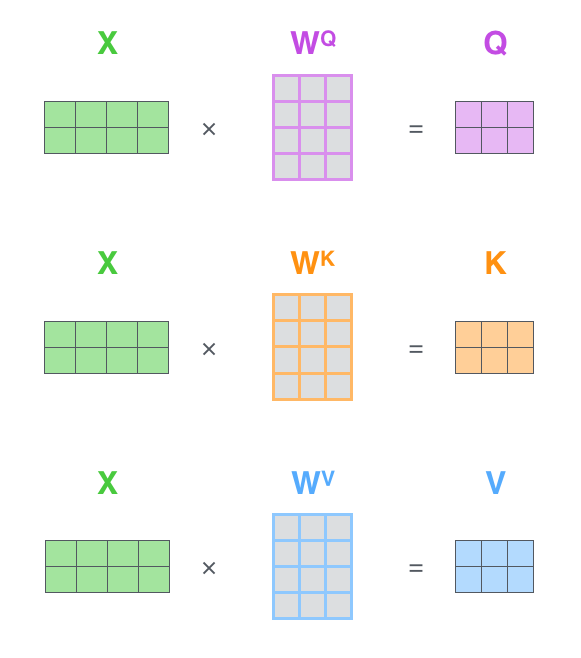

In [7]:
X = C[torch.tensor([1, 2])]
Q = X @ Wq
Q # hahahahahahaha i'm not going insane already i swear

tensor([[-1.4296,  0.5673,  0.9973],
        [ 1.4753, -1.1235, -4.7556]], grad_fn=<MmBackward0>)

In [8]:
K = X @ Wk
K

tensor([[ 0.5298,  1.2040, -0.0239],
        [ 1.3235,  0.0579, -0.4261]], grad_fn=<MmBackward0>)

In [9]:
V = X @ Wv
V

tensor([[ 0.2037,  1.3047,  0.8000],
        [ 0.6532,  1.8938, -0.4543]], grad_fn=<MmBackward0>)

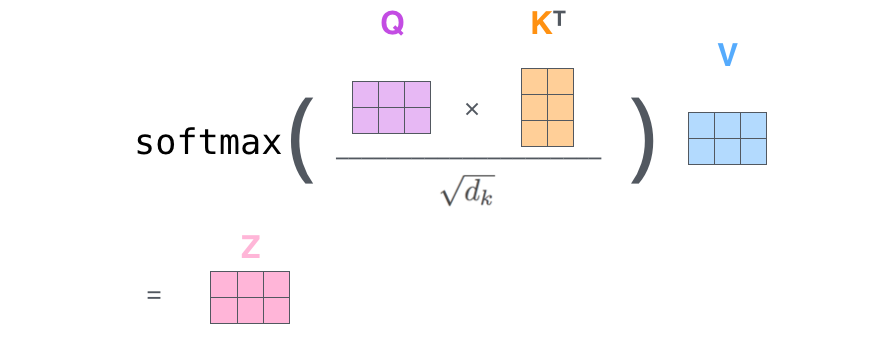

In [10]:
Z = torch.softmax((Q @ K.T)/torch.sqrt(torch.tensor(qkv_size)), dim=1) @ V

In [11]:
Z

tensor([[ 0.3029,  1.4346,  0.5233],
        [ 0.6199,  1.8501, -0.3612]], grad_fn=<MmBackward0>)

Oh man that was sketchy

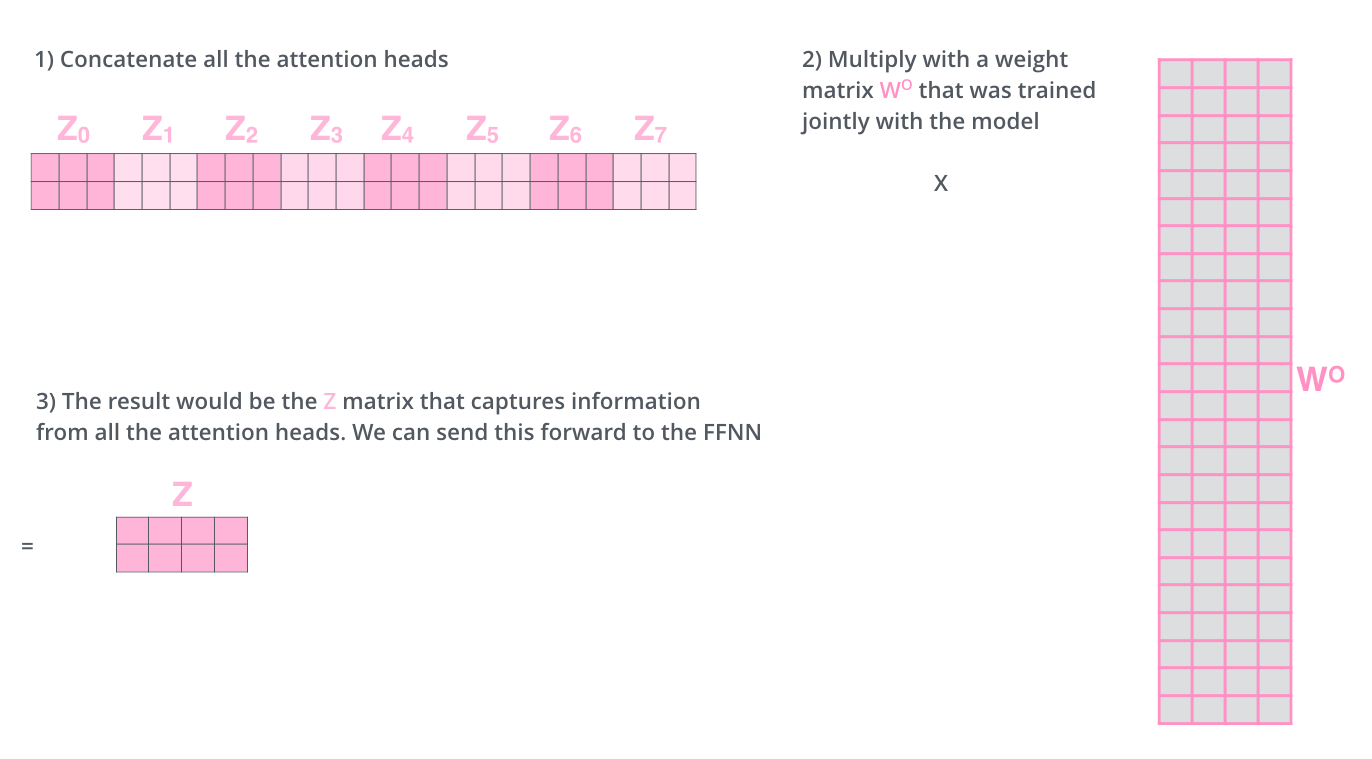

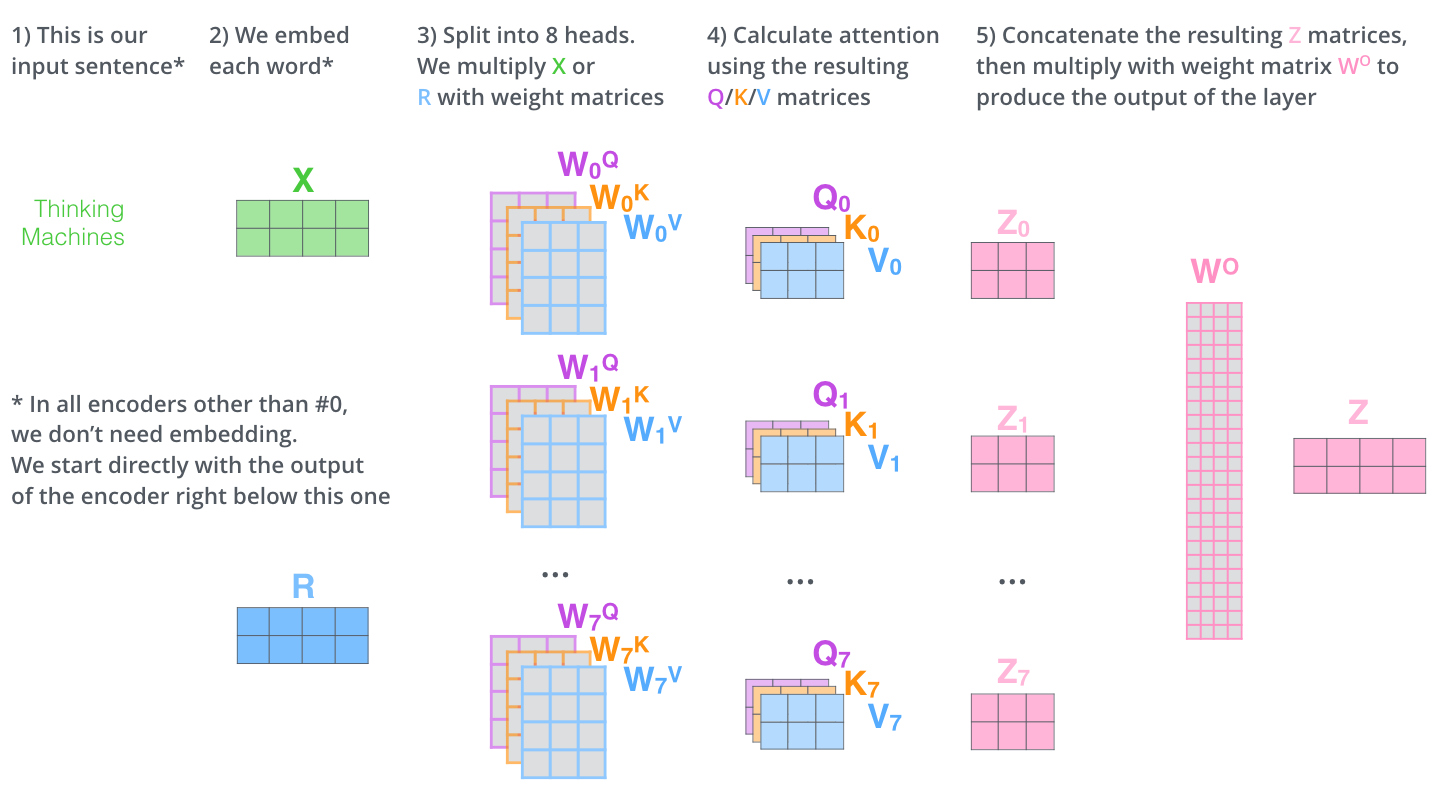

In [30]:
C = torch.randn(vocab_size, emb_dim)
Wqs, Wks, Wvs = torch.randn(3, num_heads, emb_dim, qkv_size)
Wo = torch.randn(qkv_size * num_heads, emb_dim)
params = [C, Wqs, Wks, Wvs, Wo]
for p in params:
  p.requires_grad = True

In [31]:
Z = torch.softmax((((X @ Wqs) @ (X @ Wks).mT))/torch.sqrt(torch.tensor(qkv_size)), dim=1) @ (X @ Wvs)

In [32]:
Z = Z.view(-1, qkv_size * num_heads)

In [34]:
Z = Z @ Wo

In [35]:
Z

tensor([[-2.1732, 10.8955, -0.0713,  1.8270],
        [ 9.1956, 14.1185, -1.9246,  1.5975]], grad_fn=<MmBackward0>)

Brooooooo